In [8]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

In [2]:
samsung_reviews=[]

In [3]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op

In [4]:
samsung_reviews[0:100]

['\nBest mobile with this price range. I loved the camera quality which have 100x zoom.\n',
 '\nGreat product. Smooth 120Hz display refresh rate. Perfect camera system, with fixed auto focus issue. Large size but good weight distribution. Recommend to buy a spigen case with it to protect this very expensive phone.Screen protector is pre applied.Battery life on exynos chip can be between 5-6 hours screen on time (BT, WiFi, on and connected).\n',
 '\nUPDATED:The phone is good and powerful I was an apple user for last 8 years and was looking for a powerful phone with a good quality camera and screen.Indian version needs some software fixes and hopes it will be released and fixed soon.OLDThis is not about the lockdown or something but there is an error claiming the offer. I should have ordered this from Samsung directly.This is frustrating after buying a phone which costs you a fortune and no one is bothered about how a customer is facing issues with back and forth between Amazon and Samsu

In [5]:
reviews = ' '.join(samsung_reviews)

In [6]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
reviews_token = word_tokenize(reviews)

In [45]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]

In [19]:

reviews_without_sw

['best',
 'mobile',
 'price',
 'range',
 'loved',
 'camera',
 'quality',
 'x',
 'zoom',
 'great',
 'product',
 'smooth',
 'hz',
 'display',
 'refresh',
 'rate',
 'perfect',
 'camera',
 'system',
 'fixed',
 'auto',
 'focus',
 'issue',
 'large',
 'size',
 'good',
 'weight',
 'distribution',
 'recommend',
 'buy',
 'spigen',
 'case',
 'protect',
 'expensive',
 'phone',
 'screen',
 'protector',
 'pre',
 'applied',
 'battery',
 'life',
 'exynos',
 'chip',
 'hours',
 'screen',
 'time',
 'bt',
 'wifi',
 'connected',
 'updated',
 'phone',
 'good',
 'powerful',
 'apple',
 'user',
 'last',
 'years',
 'looking',
 'powerful',
 'phone',
 'good',
 'quality',
 'camera',
 'screen',
 'indian',
 'version',
 'needs',
 'software',
 'fixes',
 'hopes',
 'released',
 'fixed',
 'soon',
 'oldthis',
 'lockdown',
 'something',
 'error',
 'claiming',
 'offer',
 'ordered',
 'samsung',
 'directly',
 'frustrating',
 'buying',
 'phone',
 'costs',
 'fortune',
 'bothered',
 'customer',
 'facing',
 'issues',
 'back',
 'f

In [17]:
reviews=' '.join(reviews_without_sw)

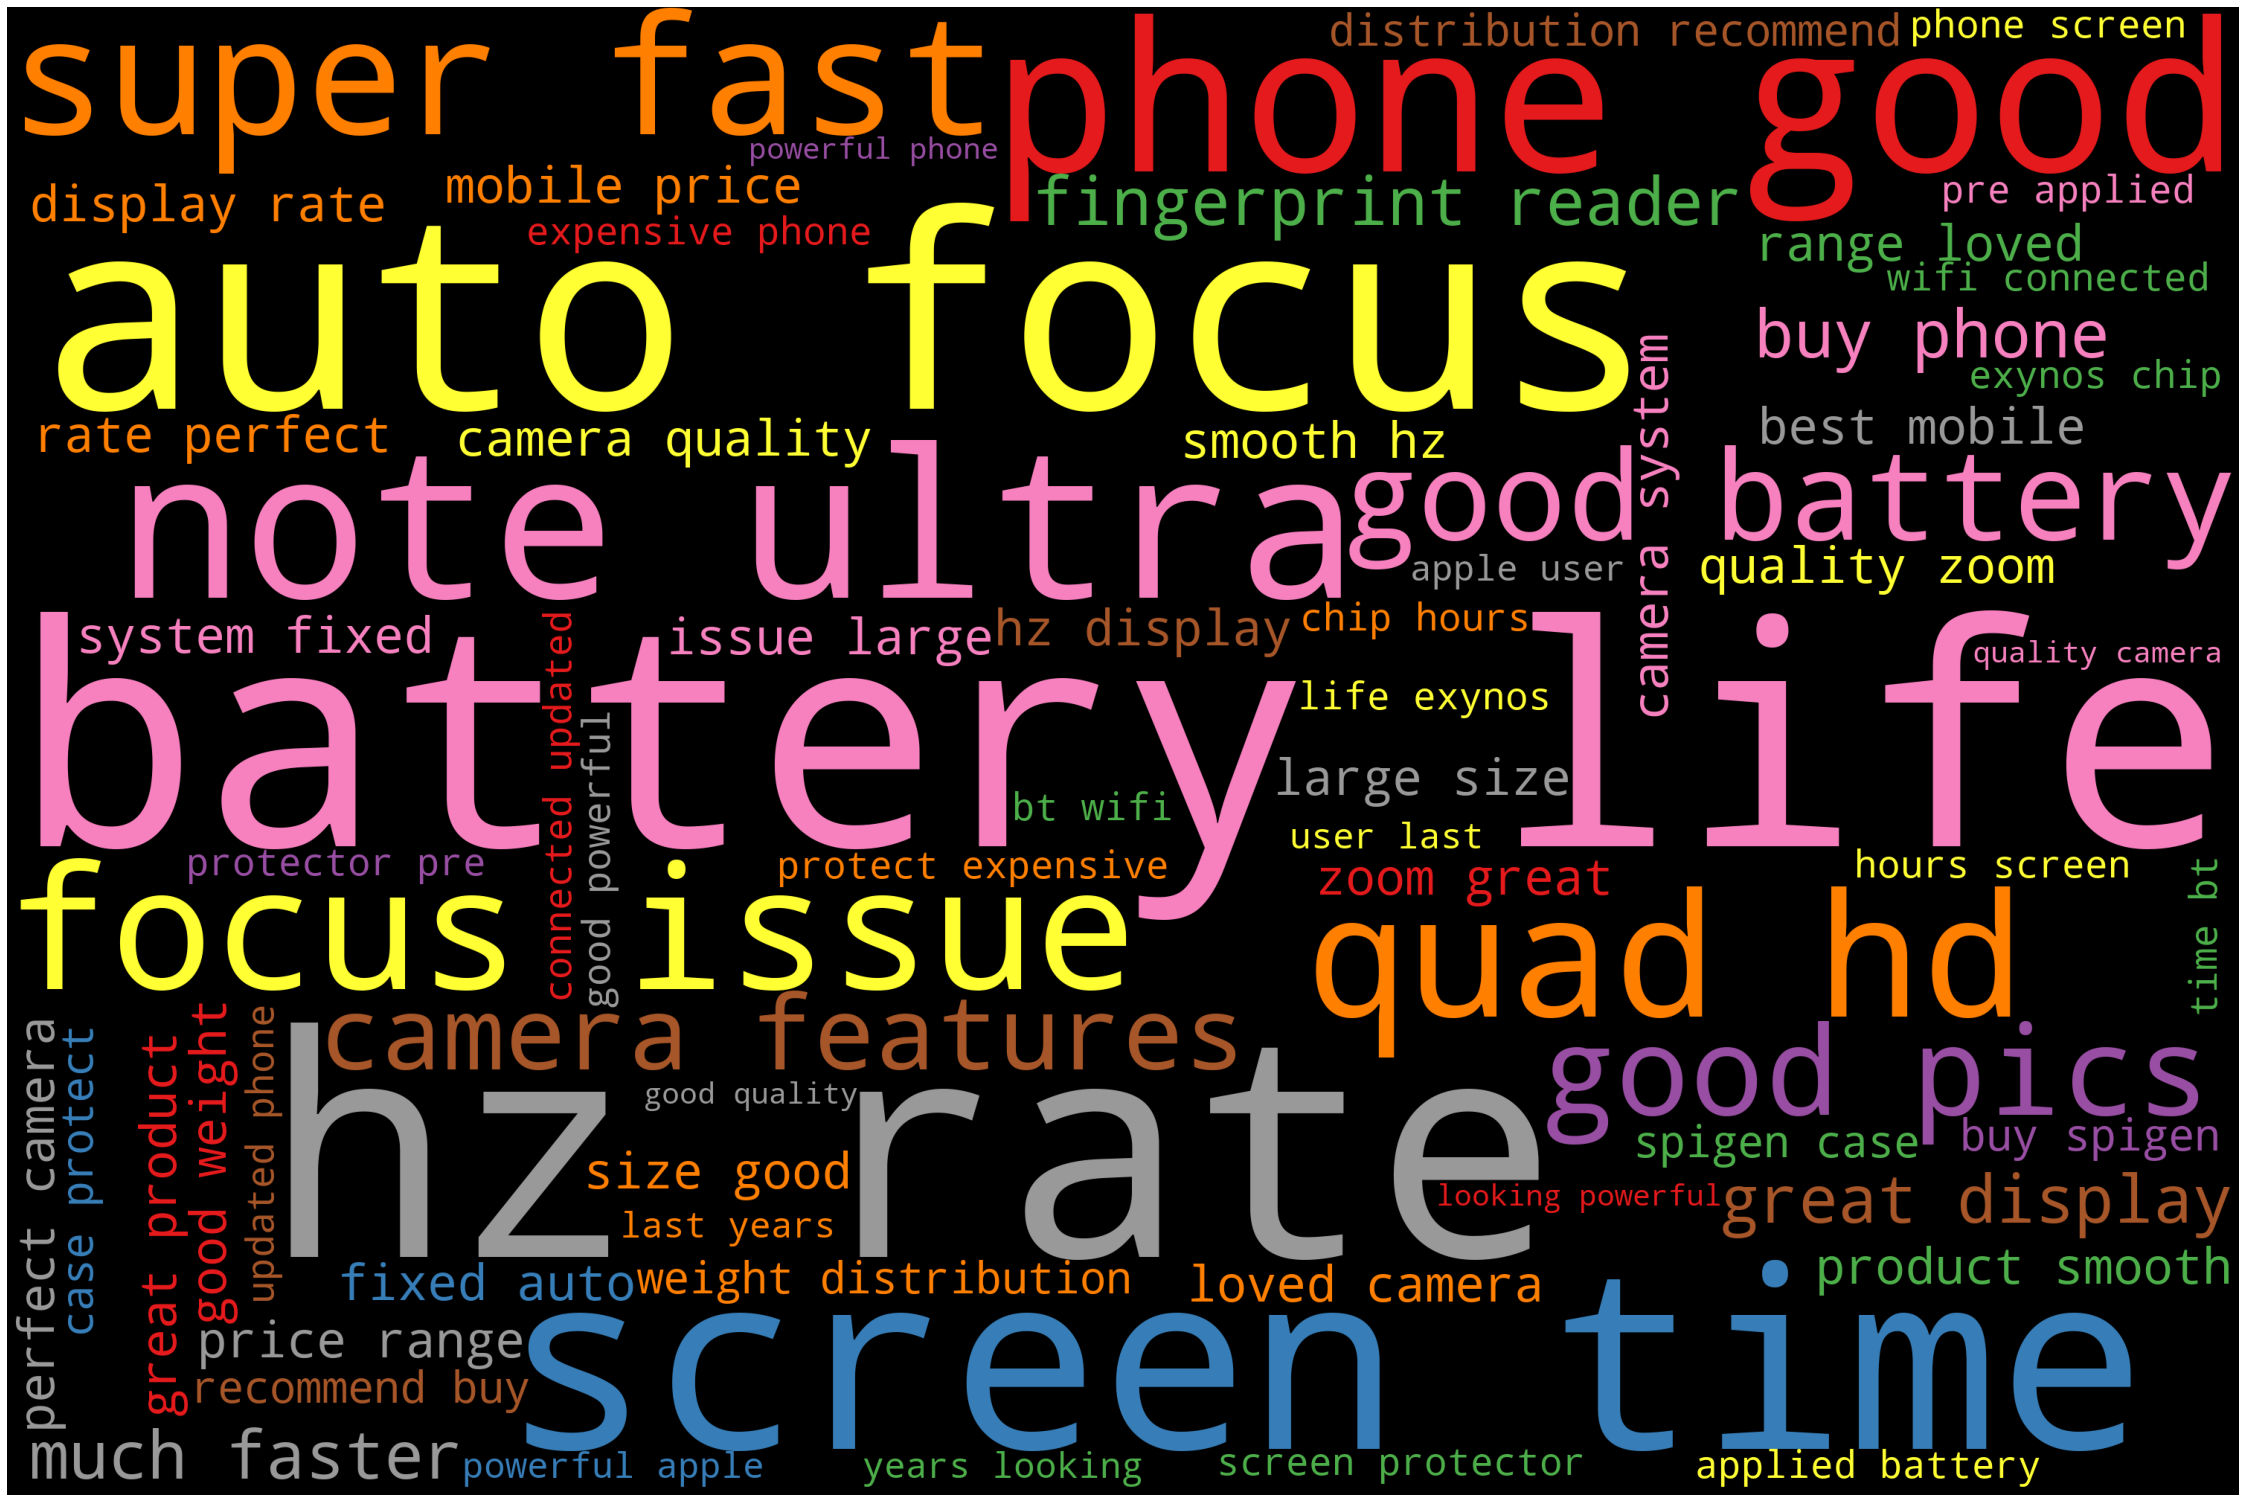

In [18]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)



Emotion Mining

In [35]:
with open("/content/negative-words (2).txt","r",encoding = "ISO-8859-1") as neg:
  negative = neg.read().split("\n")

In [36]:
negative = negative[35:]

In [37]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

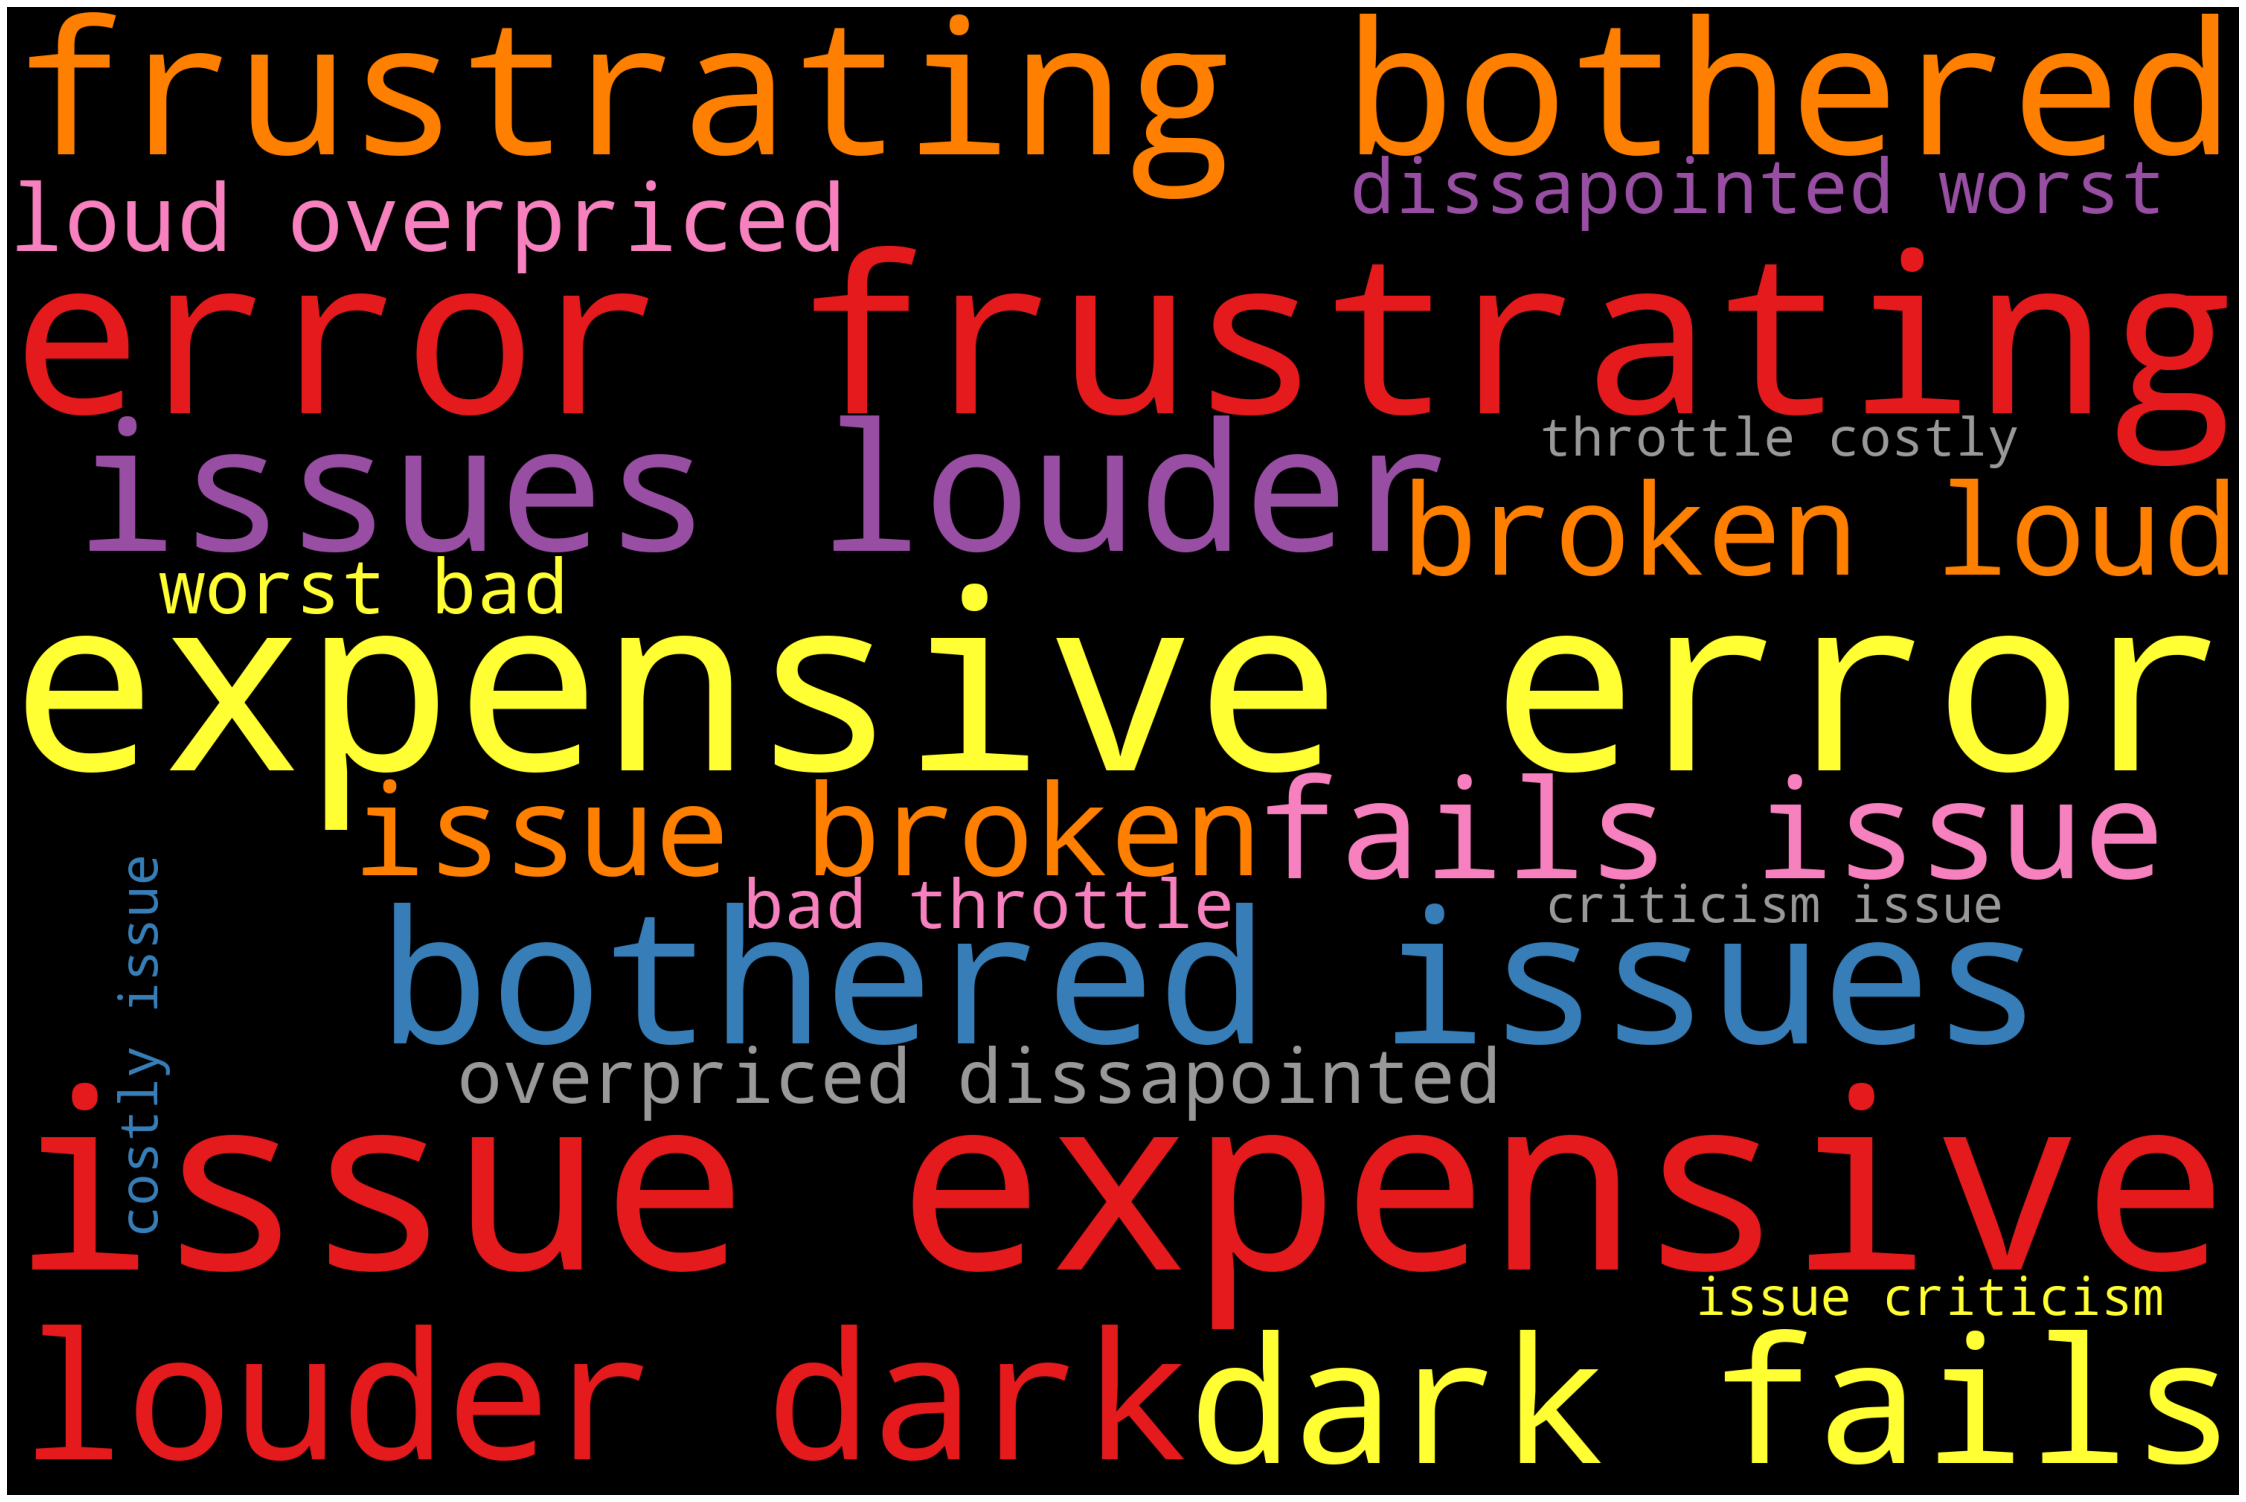

In [38]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)


In [41]:
with open("/content/positive-words (2).txt","r",encoding = "ISO-8859-1") as neg:
  positive = neg.read().split("\n")

In [42]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[35:]

In [43]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])

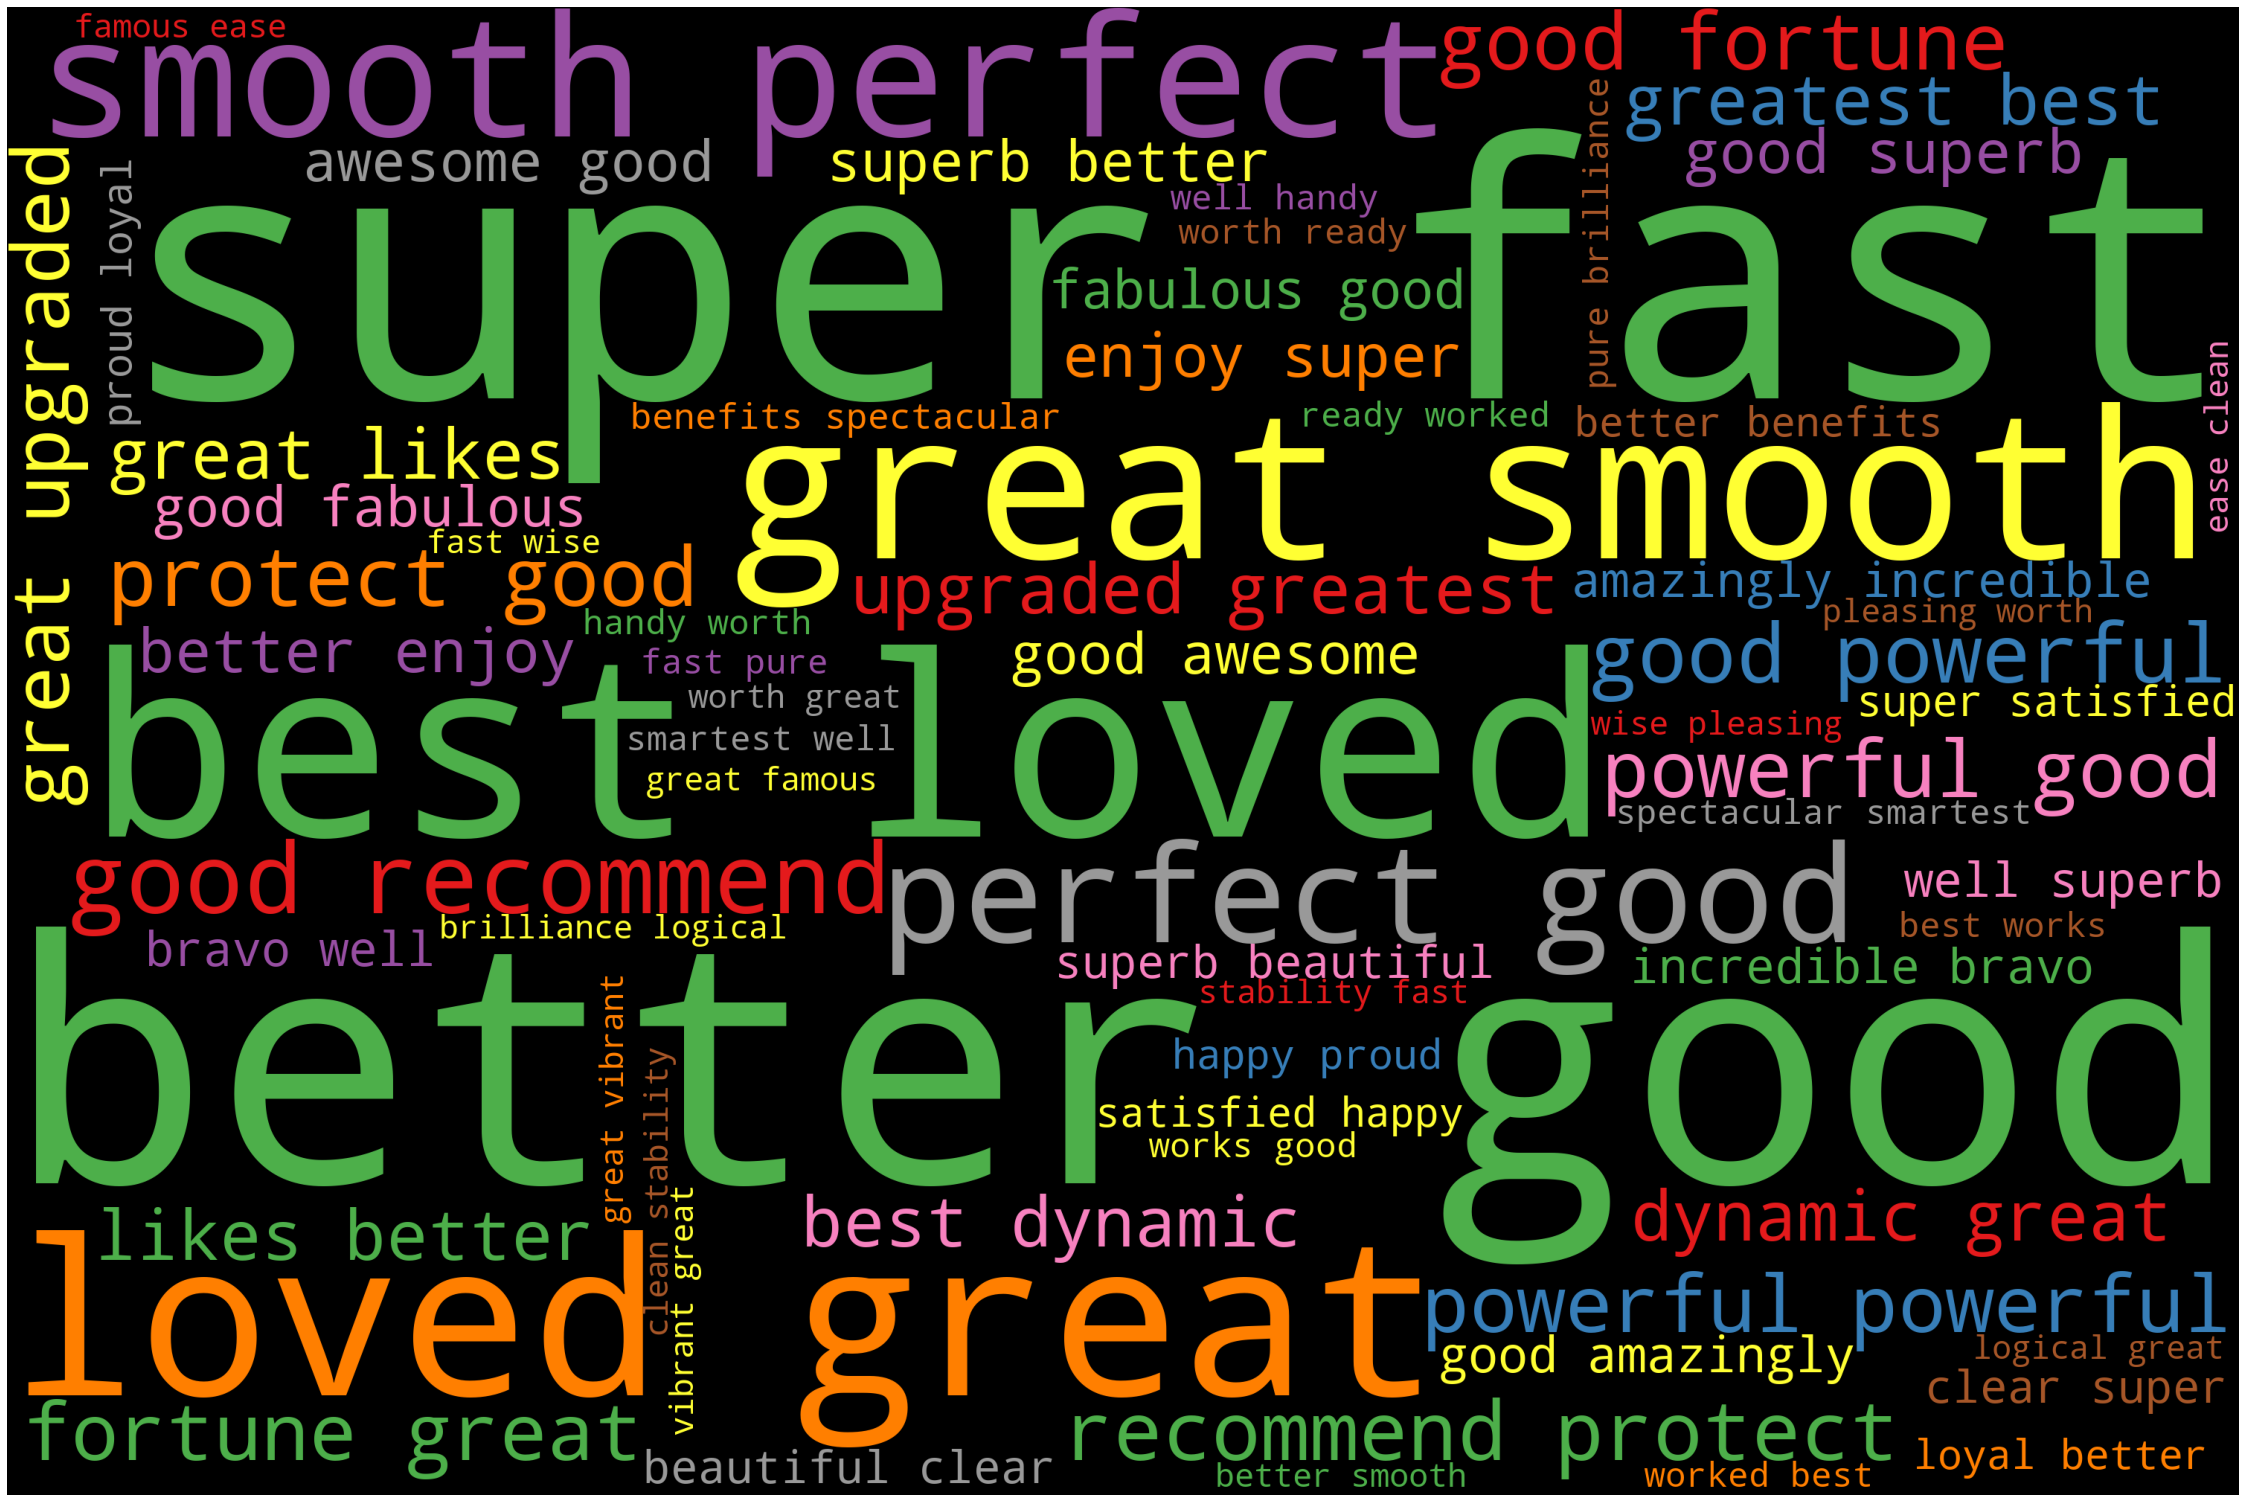

In [44]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)